WA State Fire History - 1990 - 2019

This notebook gives an overview of Washington State wildfire history from 1990 - 2019.

Using ArcGIS Python API, the following steps demonstrate a simple analysis on wildfire history using summarize within tool.

In [1]:
from arcgis.gis import GIS


myGIS = GIS('https://jonclasses.maps.arcgis.com', 'Jon.J.Lu', 'newskillz-69')

The feature layer below is a live feed satellite data showing thermal hotspots and fire activity around the globe.

<Item title:"Satellite (MODIS) Thermal Hotspots and Fire Activity" type:Feature Layer Collection owner:esri_livefeeds2>
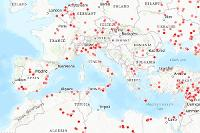

In [2]:
fire_live = myGIS.content.get("b8f4033069f141729ffb298b7418b653")
fire_live

The fire_history layer data came from FIRESTAT Fire Occurrence feature layer published by U.S. Forest Service. The data and attribute table has been slightly modified to fit the purpose of this anlaysis.

<Item title:"Washington_State_Fire_History" type:Feature Layer Collection owner:Jon.J.Lu>
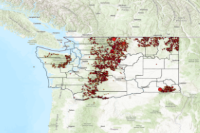

In [3]:
fire_history = myGIS.content.get("a2b8ff82e6f7400facf3cf9d6481339e")
fire_history

The county_boundary layer data originated from U.S. census feature layer. The county_boundary layer is filtered to show only Washington State.

<Item title:"WA_County_Boundary" type:Feature Layer Collection owner:Jon.J.Lu>
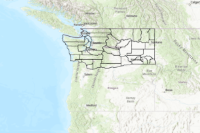

In [4]:
county_boundary = myGIS.content.get("7288d59d10c14be493fcb8d215cf1463")
county_boundary

The next 2 kernals show how to call for an map view into the notebook and add feature layers to the map.

In [5]:
myMap = myGIS.map("Washington, State")
myMap

MapView(layout=Layout(height='400px', width='100%'))

In [6]:
myMap.add_layer(fire_live)
myMap.add_layer(fire_history)
myMap.add_layer(county_boundary)

in order to run summarize within analysis tool we first need to know which fields are in the attribute table for both fire_history layer andcounty_boundary layer.

In [7]:
fire_history_layer = fire_history.layers[0]
county_boundary_layer = county_boundary.layers[0]

In [8]:
for field in fire_history_layer.properties.fields:
    print(field['name'])

OBJECTID
DISCOVER_YEAR
FIRE_NUMBER
COUNTY
TOTAL_ACRES_BURNED
TOPO_LANDFORM_ORIGIN
PRESCRIBED_FIRE
SLOPE
ELEVATION
OTHER_FUEL_MODEL
REP_WX_STATION
LAT_DEG
LAT_MIN
LAT_SEC
LONG_DEG
LONG_MIN
LONG_SEC
TOWNSHIP
RANGE
SECTION
SUB_SECTION
WIND_SPEED
DISCOVERED_BY_DESCR
FIRE_NAME
RECORD_ENTRY_DATE
AGENCY_ACRES
OTHER_ACRES_INSIDE
OTHER_ACRES_OUTSIDE
DISTRICT
LOCAL_FIRE_NUMBER
PRESCRIBED_ACRES
IGNITION
DISCOVERY
STRATEGY_MET
FIRE_OUT
SUBMITTED_DATE
APPROVED_DATE
STATE_CODE
CONTAINED
COUNTY_STATE_CODE
LOCATION
FIRE_MANAGEMENT_CODE
COMPLEX_FIRE
WUI_FIRE
WUI_ACRES
OBJECTIVES
CREATED_DATE
LAST_MODIFIED_DATE
POO_LATITUDE
POO_LONGITUDE
COMPLEX_NAME
STATION_TYPE
STATION_NAME
ASPECT
PRINCIPAL_MERIDIAN
STATISTICAL_CAUSE
FIRE_SIZE_CLASS
FIRE_DETECTOR
NFDRS_FUEL_MODEL
COVER_CLASS
FIRE_INTENSITY_LEVEL
INITIAL_STRATEGY
LOCAL_TIMEZONE
PROTECTING_AGENCY_AT_ORIGIN
OWNERSHIP_AGENCY_AT_ORIGIN
STATE_NAME
COUNTY_NAME
REPORT_UNIT
REPORT_UNIT_NAME
ADMIN_UNIT
ADMIN_UNIT_NAME
OWNERSHIP_UNIT
OWNERSHIP_UNIT_NAME
PROTECTI

In [9]:
for field in county_boundary_layer.properties.fields:
    print(field['name'])

OBJECTID
STATEFP
COUNTYFP
COUNTYNS
GEOID
NAME
NAMELSAD
LSAD
CLASSFP
MTFCC
CSAFP
CBSAFP
METDIVFP
FUNCSTAT
ALAND
AWATER
INTPTLAT
INTPTLON
Shape__Area
Shape__Length


Finally, to run the summarize within analysis tool, we need to import from arcgis.features and import summarize_data. In the second line, you can see the parameters set for the summarize_data. An optional parameter is used to summarize total acres burned.

In [10]:
from arcgis.features import summarize_data

fire_summary = summarize_data.aggregate_points(point_layer = fire_history_layer,
                                              polygon_layer = county_boundary_layer,
                                              keep_boundaries_with_no_points = True,
                                              summary_fields = ['TOTAL_ACRES_BURNED Sum'])

In [11]:
fire_summary

{'aggregated_layer': <FeatureCollection>, 'group_summary': ''}

After the analysis, below we call for the attrubute table to get a preview.

In [12]:
fire_history_aggregate = fire_summary['aggregated_layer']

fire_history_aggregate_fset = fire_history_aggregate.query()

In [13]:
fire_history_aggregate_df = fire_history_aggregate_fset.sdf

fire_history_aggregate_df

,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape__Area,Shape__Length,sum_total_acres_burned,Point_Count,AnalysisArea,SHAPE
0,1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,,,,A,680976231,61568965,+46.2946377,-123.4244583,0.086692,1.449177,0.00,0,742.545558,"{""rings"": [[[-123.49076699999995, 46.383583000..."
1,2,53,029,01513272,53029,Island,Island County,06,H1,G4020,500,36020,,A,539943912,799920796,+48.1585538,-122.6706492,0.161982,1.860858,0.00,0,1339.865365,"{""rings"": [[[-122.42508699999996, 48.275259000..."
2,3,53,055,01531931,53055,San Juan,San Juan County,06,H1,G4020,,,,A,450432205,1157478544,+48.5071904,-123.1037693,0.195903,2.050102,1.00,1,1607.912841,"{""rings"": [[[-122.94038699999999, 48.352446000..."
3,4,53,035,01529223,53035,Kitsap,Kitsap County,06,H1,G4020,500,14740,,A,1023308791,442187072,+47.6395948,-122.6496339,0.175410,2.090992,0.00,0,1465.495469,"{""rings"": [[[-122.45478099999997, 47.576186000..."
4,5,53,011,01531820,53011,Clark,Clark County,06,H1,G4020,440,38900,,A,1627792396,70200672,+45.7717295,-122.4859533,0.196436,2.119934,0.40,1,1697.993827,"{""rings"": [[[-122.55603999999994, 45.956602000..."
5,6,53,003,01533502,53003,Asotin,Asotin County,06,H1,G4020,,30300,,A,1647427905,11291731,+46.1818612,-117.2277813,0.193310,2.127617,3426.66,43,1658.719961,"{""rings"": [[[-117.06126599999999, 46.367413000..."
6,7,53,013,01513273,53013,Columbia,Columbia County,06,H1,G4020,,,,A,2249624779,12561759,+46.2928505,-117.9116345,0.264141,2.573611,52135.16,105,2262.186776,"{""rings"": [[[-117.73736699999995, 46.449330000..."
7,8,53,023,01533500,53023,Garfield,Garfield County,06,H1,G4020,,,,A,1841054897,19294817,+46.4293176,-117.5367052,0.217749,2.575233,32.10,64,1860.350753,"{""rings"": [[[-117.80465899999996, 46.624625000..."
8,9,53,045,01529221,53045,Mason,Mason County,06,H1,G4020,500,43220,,A,2485218918,236969801,+47.3508322,-123.1731033,0.324061,2.578760,3331.76,104,2722.188723,"{""rings"": [[[-123.00567199999995, 47.148941000..."
9,10,53,049,01513274,53049,Pacific,Pacific County,06,H1,G4020,,,,A,2418037245,758680651,+46.5565866,-123.7824193,0.372635,2.755833,0.00,0,3176.718595,"{""rings"": [[[-123.36897199999999, 46.711277000..."


With the attribute table in view, you can plot different charts using the summarized information. 

Below displays 2 bar charts summarizing the total point count (fire count) in each county and total acres burn in each county.

In [14]:
import matplotlib.pyplot as plt

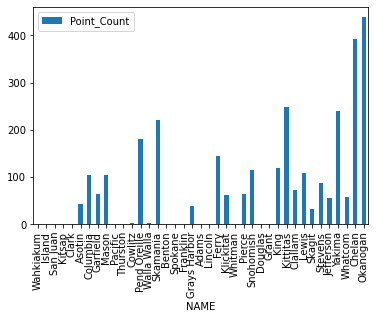

In [15]:
%matplotlib inline
fire_history_aggregate_df.plot("NAME","Point_Count", kind ="bar")
plt.show()

<Item title:"WA_State_Fire_Count" type:Feature Layer Collection owner:Jon.J.Lu>
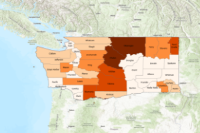

In [16]:
count_of_fire = myGIS.content.get("f8e6818e185741feb6f694ed29619e27")
count_of_fire

In [17]:
myMap2 = myGIS.map("Washington, State")
myMap2

MapView(layout=Layout(height='400px', width='100%'))

In [18]:
myMap2.add_layer(count_of_fire)

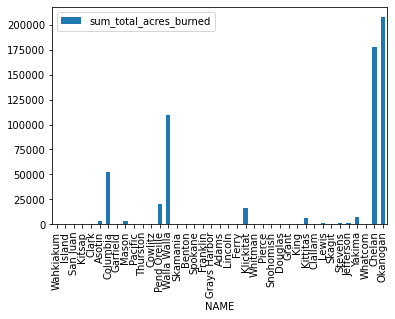

In [19]:
%matplotlib inline
fire_history_aggregate_df.plot("NAME","sum_total_acres_burned", kind ="bar")
plt.show()

<Item title:"WA_State_Acres_Burned" type:Feature Layer Collection owner:Jon.J.Lu>
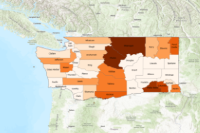

In [20]:
total_acres_burned = myGIS.content.get("6e3c354c4d5344aea9b5d249057e8c8b")
total_acres_burned

In [21]:
myMap3 = myGIS.map("Washington, State")
myMap3

MapView(layout=Layout(height='400px', width='100%'))

In [22]:
myMap3.add_layer(total_acres_burned)

Visit Fire History Webapp Here https://jonclasses.maps.arcgis.com/apps/webappviewer/index.html?id=b9d0f261b43048909d8e3a1582d19dd2